<a href="https://colab.research.google.com/github/Tvorozh0k/ssu-ml-course/blob/main/9_neural_networks_part1/ML_NN_1_D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подключение библиотек

In [ ]:
#@title Подключение и настройка библиотеки Pandas

import pandas as pd

from google.colab import drive
from google.colab import data_table
from google.colab.data_table import DataTable

DataTable.num_rows_per_page = 10
DataTable.max_columns = 60
data_table.enable_dataframe_formatter()

In [ ]:
#@title Подключение графических библиотек

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#@title Подключение математических библиотек

import random
import numpy as np

In [ ]:
#@title Библиотека для анализа PCA

!pip install prince

In [ ]:
#@title Подключение библиотеки Sklearn

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.datasets import load_digits, fetch_openml

# модели машинного обучения
from sklearn.neural_network import MLPClassifier

# оценки качества моделей
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# преобразование признаков
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# понижение размерности
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap, SpectralEmbedding, TSNE
from sklearn.neighbors import NeighborhoodComponentsAnalysis

# отбор признаков
from sklearn.feature_selection import SelectKBest, SequentialFeatureSelector

# заполнение пропусков
from sklearn.impute import SimpleImputer

# конструкторы
from sklearn.pipeline import Pipeline

In [ ]:
#@title Подбор гиперпараметров, основанный на генетических алгоритмах

!pip install tpot

## Загрузка датасета

In [ ]:
#@title Датасет (данные)

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
#@title Статистические данные

print('Обучающая выборка:', X_train.shape)
print('Тестовая выборка:', X_test.shape)

Обучающая выборка: (52500, 784)
Тестовая выборка: (17500, 784)


In [ ]:
#@title Распределение по классам

fig = px.histogram(x=list(y_train)+list(y_test), color=["train" for x in y_train]+["test" for x in y_test], barmode='overlay')

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="Распределение по классам",
    xaxis_title="Цифра",
    yaxis_title="Кол-во",
    legend_title="Выборка"
)

fig.show()

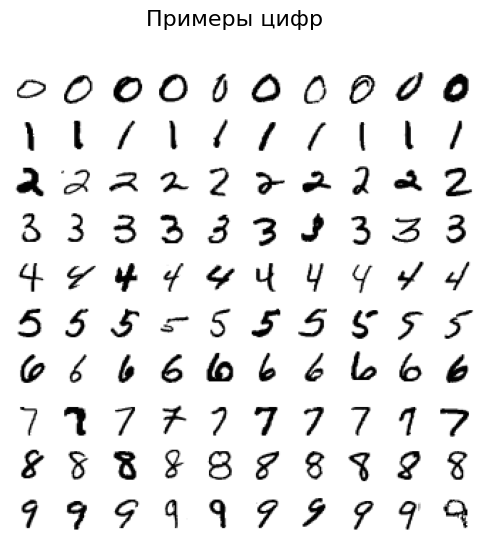

In [ ]:
#@title Примеры цифр (без преобразования)

pos = [list(np.where(y_train == str(i))[0][:10]) for i in range(10)]

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    # digits.image[train_ind[pos[idx // 10][idx % 10]]]
    ax.imshow(np.array(X_train)[pos[idx // 10][idx % 10]].reshape((28, 28)), cmap=plt.cm.binary)
    ax.axis("off")

_ = fig.suptitle("Примеры цифр", fontsize=16)

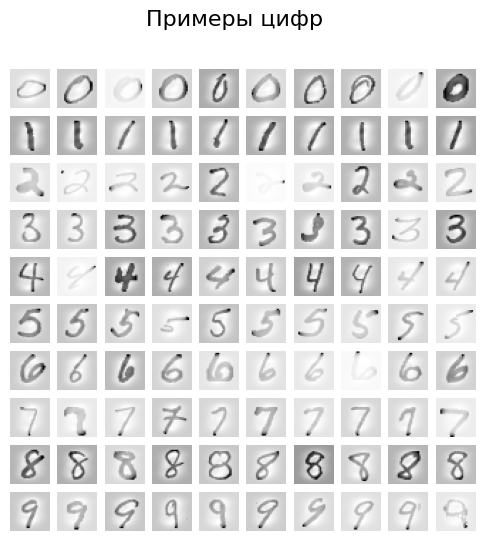

In [ ]:
#@title Примеры цифр (StandardScaler)

pos = [list(np.where(y_train == str(i))[0][:10]) for i in range(10)]

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    # digits.image[train_ind[pos[idx // 10][idx % 10]]]
    ax.imshow(np.array(StandardScaler().fit_transform(X_train))[pos[idx // 10][idx % 10]].reshape((28, 28)), cmap=plt.cm.binary)
    ax.axis("off")

_ = fig.suptitle("Примеры цифр", fontsize=16)

## Уменьшение размерности

### 1. PCA (Метод главных компонент)

In [ ]:
#@title Подбираем число признаков

import prince

pca = prince.PCA(
    n_components=500,
    engine='sklearn',
    random_state=42
)

pca = pca.fit(pd.DataFrame(X_train))

fig = px.bar(x=[i+1 for i in range(500)], y=pca.cumulative_percentage_of_variance_)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="Сохраняемое кол-во информации",
    xaxis_title="Число признаков",
    yaxis_title="Процентное кол-во сохраненной информации"
)

fig.show()

In [ ]:
#@title PCA

import prince

# виды масштабирования

X_train_none = prince.PCA(n_components=2, engine='sklearn', random_state=42).fit_transform(X_train)
X_train_ms1 = prince.PCA(n_components=2, engine='sklearn', random_state=42).fit_transform(pd.DataFrame(MinMaxScaler().fit_transform(X_train)))
X_train_ms2 = prince.PCA(n_components=2, engine='sklearn', random_state=42).fit_transform(pd.DataFrame(MinMaxScaler((-1, 1)).fit_transform(X_train)))
X_train_ss = prince.PCA(n_components=2, engine='sklearn', random_state=42).fit_transform(pd.DataFrame(StandardScaler().fit_transform(X_train)))

# формируем датасет для отрисовки

df = pd.DataFrame(np.vstack((X_train_none, X_train_ms1, X_train_ms2, X_train_ss)), columns=['PC1', 'PC2'])

n = X_train.shape[0]
df['TypeScaler'] = ['None'] * n + ['MinMaxScaler [0, 1]'] * n + ['MinMaxScaler [-1, 1]'] * n + ['StandardScaler'] * n
df['Digit'] = [str(x) for x in y_train] * 4

fig = px.scatter(df, x='PC1', y='PC2', color='Digit', facet_col='TypeScaler', facet_col_wrap=2, facet_row_spacing=0.15, facet_col_spacing=0.05)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    height=600,
    title="PCA",
    legend_title_text="Класс"
)

fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))

fig.update_xaxes(matches=None)
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))

fig.show()

> **Выводы:**

* масшабирование признаков не влияет на результаты PCA
* PCA показывает плохое разбиение по классам

### 2. TruncatedSVD

In [ ]:
#@title TruncatedSVD

# виды масштабирования

X_train_none = pd.DataFrame(np.array(TruncatedSVD(n_components=2, random_state=42).fit_transform(X_train)), columns=['PC1', 'PC2'])
X_train_ms1 = pd.DataFrame(np.array(TruncatedSVD(n_components=2, random_state=42).fit_transform(MinMaxScaler().fit_transform(X_train))), columns=['PC1', 'PC2'])
X_train_ms2 = pd.DataFrame(np.array(TruncatedSVD(n_components=2, random_state=42).fit_transform(MinMaxScaler((-1, 1)).fit_transform(X_train))), columns=['PC1', 'PC2'])
X_train_ss = pd.DataFrame(np.array(TruncatedSVD(n_components=2, random_state=42).fit_transform(StandardScaler().fit_transform(X_train))), columns=['PC1', 'PC2'])

# формируем датасет для отрисовки

df = pd.DataFrame(np.vstack((X_train_none, X_train_ms1, X_train_ms2, X_train_ss)), columns=['PC1', 'PC2'])

n = X_train.shape[0]
df['TypeScaler'] = ['None'] * n + ['MinMaxScaler [0, 1]'] * n + ['MinMaxScaler [-1, 1]'] * n + ['StandardScaler'] * n
df['Digit'] = [str(x) for x in y_train] * 4

fig = px.scatter(df, x='PC1', y='PC2', color='Digit', facet_col='TypeScaler', facet_col_wrap=2, facet_row_spacing=0.15, facet_col_spacing=0.05)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    height=600,
    title="TruncatedSVD",
    legend_title_text="Класс"
)

fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))

fig.update_xaxes(matches=None)
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))

fig.show()

> **Выводы:**

* масшабирование признаков влияет на результаты TruncatedSVD
* TruncatedSVD показывает плохое разбиение по классам

### 3. LinearDiscriminantAnalysis

In [ ]:
#@title LinearDiscriminantAnalysis

# виды масштабирования

X_train_none = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_train, y_train)
X_train_ms1 = LinearDiscriminantAnalysis(n_components=2).fit_transform(MinMaxScaler().fit_transform(X_train), y_train)
X_train_ms2 = LinearDiscriminantAnalysis(n_components=2).fit_transform(MinMaxScaler((-1, 1)).fit_transform(X_train), y_train)
X_train_ss = LinearDiscriminantAnalysis(n_components=2).fit_transform(StandardScaler().fit_transform(X_train), y_train)

# формируем датасет для отрисовки

df = pd.DataFrame(np.vstack((X_train_none, X_train_ms1, X_train_ms2, X_train_ss)), columns=['PC1', 'PC2'])

n = X_train.shape[0]
df['TypeScaler'] = ['None'] * n + ['MinMaxScaler [0, 1]'] * n + ['MinMaxScaler [-1, 1]'] * n + ['StandardScaler'] * n
df['Digit'] = [str(x) for x in y_train] * 4

fig = px.scatter(df, x='PC1', y='PC2', color='Digit', facet_col='TypeScaler', facet_col_wrap=2, facet_row_spacing=0.15, facet_col_spacing=0.05)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    height=600,
    title="LinearDiscriminantAnalysis",
    legend_title_text="Класс"
)

fig.show()

> **Выводы:**

* масшабирование признаков влияет на результаты LinearDiscriminantAnalysis
* LinearDiscriminantAnalysis хорошо распознает цифры 0, 4 и 6
* LinearDiscriminantAnalysis плохо распределяет все классы

In [ ]:
#@title LinearDiscriminantAnalysis(n_components=3)

df = pd.DataFrame(LinearDiscriminantAnalysis(n_components=3).fit_transform(X_train, y_train), columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color=[str(x) for x in y_train])

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    width=900,
    height=600,
    title="LinearDiscriminantAnalysis",
    legend_title_text="Класс"
)

fig.show()

### 4. Isomap

In [ ]:
#@title Isomap

X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42, stratify=y_train)

# виды масштабирования

X_train_none = np.array(Isomap(n_components=2, metric='l2').fit_transform(X_train_small))
X_train_ms1 = np.array(Isomap(n_components=2, metric='l2').fit_transform(MinMaxScaler().fit_transform(X_train_small)))
X_train_ms2 = np.array(Isomap(n_components=2, metric='l2').fit_transform(MinMaxScaler((-1, 1)).fit_transform(X_train_small)))
X_train_ss = np.array(Isomap(n_components=2, metric='l2').fit_transform(StandardScaler().fit_transform(X_train_small)))

# формируем датасет для отрисовки

df = pd.DataFrame(np.vstack((X_train_none, X_train_ms1, X_train_ms2, X_train_ss)), columns=['PC1', 'PC2'])

n = X_train_small.shape[0]
df['TypeScaler'] = ['None'] * n + ['MinMaxScaler [0, 1]'] * n + ['MinMaxScaler [-1, 1]'] * n + ['StandardScaler'] * n
df['Digit'] = [str(x) for x in y_train_small] * 4

fig = px.scatter(df, x='PC1', y='PC2', color='Digit', facet_col='TypeScaler', facet_col_wrap=2, facet_row_spacing=0.15, facet_col_spacing=0.05)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    height=600,
    title="Isomap",
    legend_title_text="Класс"
)

fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))

fig.update_xaxes(matches=None)
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))

fig.show()

In [ ]:
#@title Isomap(n_components=3)

df = pd.DataFrame(Isomap(n_components=3).fit_transform(StandardScaler().fit_transform(X_train_small)), columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color=[str(x) for x in y_train_small])

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    width=900,
    height=600,
    title="Isomap",
    legend_title_text="Класс"
)

fig.show()

In [ ]:
#@title Isomap(n_components=3, l1)

df = pd.DataFrame(Isomap(n_components=3, metric='l1').fit_transform(StandardScaler().fit_transform(X_train_small)), columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color=[str(x) for x in y_train_small])

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    width=900,
    height=600,
    title="Isomap",
    legend_title_text="Класс"
)

fig.show()

In [ ]:
#@title Isomap(n_components=3, canberra)

df = pd.DataFrame(Isomap(n_components=3, metric='canberra').fit_transform(StandardScaler().fit_transform(X_train_small)), columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color=[str(x) for x in y_train_small])

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    width=900,
    height=600,
    title="Isomap",
    legend_title_text="Класс"
)

fig.show()

In [ ]:
#@title Isomap(n_components=3, chebyshev)

df = pd.DataFrame(Isomap(n_components=3, metric='chebyshev').fit_transform(StandardScaler().fit_transform(X_train_small)), columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color=[str(x) for x in y_train_small])

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    width=900,
    height=600,
    title="Isomap",
    legend_title_text="Класс"
)

fig.show()

## 1. Обучение (многоклассовая классификация)

### MLPClassifier (без подбора параметров)

In [ ]:
#@title Анализируем работу различных масштабирований и нормализаций

scalers = [None, MinMaxScaler(), MinMaxScaler((-1, 1)), StandardScaler()]
scalers_name = ["None", "MinMaxScaler[0,1]", "MinMaxScaler[-1,1]", "StandardScaler"]

for i in range(4):
    steps = []

    if scalers is not None:
        steps.append(('scaler', scalers[i]))

    steps.append(('estimator', MLPClassifier()))
    pipe = Pipeline(steps=steps).fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f"MLPClassifier + {scalers_name[i]} (число ошибок): {np.where(y_pred != y_test)[0].shape[0]}")

MLPClassifier + None (число ошибок): 688
MLPClassifier + MinMaxScaler[0,1] (число ошибок): 387
MLPClassifier + MinMaxScaler[-1,1] (число ошибок): 409
MLPClassifier + StandardScaler (число ошибок): 474


> При повторном запуске результаты также значительно меняются

#### Итоговая модель

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier())]).fit(X_train, y_train)
pipe

Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier())])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5177
           1       1.00      1.00      1.00      5908
           2       1.00      1.00      1.00      5242
           3       1.00      1.00      1.00      5356
           4       1.00      1.00      1.00      5118
           5       1.00      1.00      1.00      4735
           6       1.00      1.00      1.00      5157
           7       1.00      1.00      1.00      5470
           8       1.00      1.00      1.00      5119
           9       1.00      1.00      1.00      5218

    accuracy                           1.00     52500
   macro avg       1.00      1.00      1.00     52500
weighted avg       1.00      1.00      1.00     52500



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1726
           1       0.98      0.99      0.99      1969
           2       0.98      0.98      0.98      1748
           3       0.98      0.97      0.97      1785
           4       0.98      0.98      0.98      1706
           5       0.98      0.97      0.97      1578
           6       0.98      0.99      0.98      1719
           7       0.98      0.97      0.98      1823
           8       0.98      0.97      0.97      1706
           9       0.96      0.97      0.97      1740

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff'] + (25 * ['#23c552']), text_auto=True)

fig.update_layout(width=700, height=700)
fig.show()

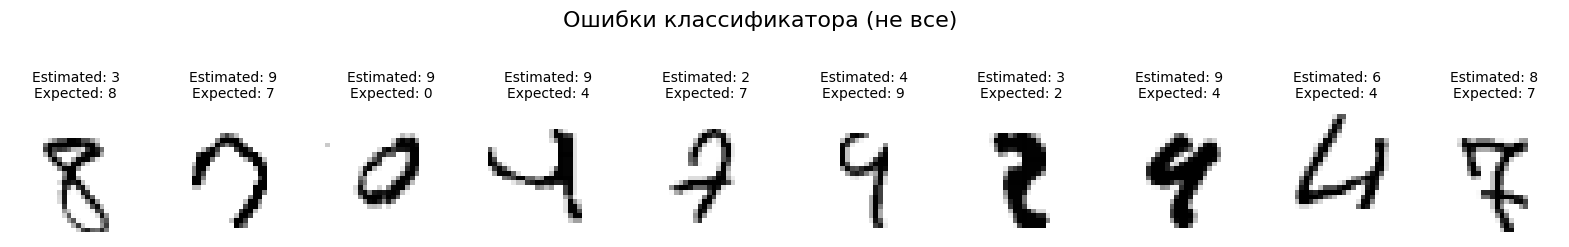

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test[i] != y_pred[i]):
        pos.append(i)

pos = pos[:10]

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(1, 10, figsize=(20, 4))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes):
    ax.imshow(np.array(X_test)[pos[i]].reshape((28, 28)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора (не все)', fontsize=16, y=0.9)
fig.show()

### MLPClassifier (с подбором параметров)

In [ ]:
#@title Анализируем работу различных функций активации (ФА) и оптимизаторов

for activation in ['tanh', 'relu']:
    for solver in ['lbfgs', 'sgd', 'adam']:
        pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(activation=activation, solver=solver))]).fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        print(f"MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation={activation}, solver={solver}): {np.where(y_pred != y_test)[0].shape[0]}")

MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=tanh, solver=lbfgs): 505


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=tanh, solver=sgd): 647
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=tanh, solver=adam): 439
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=relu, solver=lbfgs): 485


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=relu, solver=sgd): 567
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=relu, solver=adam): 399


In [ ]:
#@title Анализируем работу при различных параметрах регуляризации

for alpha in np.geomspace(0.0001, 1, 5):
    pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(alpha=alpha))]).fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f"MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha={alpha}): {np.where(y_pred != y_test)[0].shape[0]}")

MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=0.0001): 454
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=0.001): 386
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=0.01): 362
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=0.1): 361
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=1.0): 838


#### Итоговая модель

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(alpha=0.05))]).fit(X_train, y_train)
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator', MLPClassifier(alpha=0.05))])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5177
           1       1.00      1.00      1.00      5908
           2       1.00      1.00      1.00      5242
           3       1.00      1.00      1.00      5356
           4       1.00      1.00      1.00      5118
           5       1.00      1.00      1.00      4735
           6       1.00      1.00      1.00      5157
           7       1.00      1.00      1.00      5470
           8       1.00      0.99      0.99      5119
           9       0.99      1.00      1.00      5218

    accuracy                           1.00     52500
   macro avg       1.00      1.00      1.00     52500
weighted avg       1.00      1.00      1.00     52500



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1726
           1       0.98      0.99      0.99      1969
           2       0.98      0.98      0.98      1748
           3       0.98      0.97      0.98      1785
           4       0.98      0.98      0.98      1706
           5       0.98      0.97      0.98      1578
           6       0.99      0.99      0.99      1719
           7       0.98      0.98      0.98      1823
           8       0.99      0.96      0.98      1706
           9       0.96      0.98      0.97      1740

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff'] + (25 * ['#23c552']), text_auto=True)

fig.update_layout(width=700, height=700)
fig.show()

Кол-во ошибок: 359


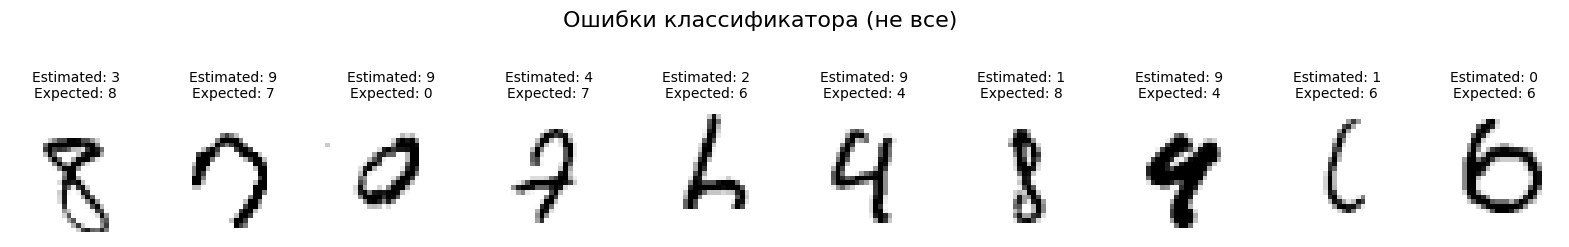

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test[i] != y_pred[i]):
        pos.append(i)

print(f"Кол-во ошибок: {len(pos)}")
pos = pos[:10]

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(1, 10, figsize=(20, 4))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes):
    ax.imshow(np.array(X_test)[pos[i]].reshape((28, 28)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора (не все)', fontsize=16, y=0.9)
fig.show()

### MLPClassifier (с уменьшением размерности)

#### MLPClassifier + Isomap(250, l1)

In [ ]:
#@title Преобразовываем признаки

X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42, stratify=y_train)

isomap = Isomap(n_components=250, metric='l1').fit(X_train_small)
X_train1 = isomap.transform(X_train)
X_test1 = isomap.transform(X_test)

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(alpha=0.05))]).fit(X_train1, y_train)
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator', MLPClassifier(alpha=0.05))])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train1)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5177
           1       0.93      0.99      0.96      5908
           2       0.96      0.95      0.95      5242
           3       0.94      0.94      0.94      5356
           4       0.97      0.93      0.95      5118
           5       0.95      0.92      0.94      4735
           6       0.98      0.98      0.98      5157
           7       0.92      0.96      0.94      5470
           8       0.95      0.91      0.93      5119
           9       0.92      0.93      0.92      5218

    accuracy                           0.95     52500
   macro avg       0.95      0.95      0.95     52500
weighted avg       0.95      0.95      0.95     52500



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1726
           1       0.92      0.99      0.95      1969
           2       0.96      0.93      0.94      1748
           3       0.92      0.92      0.92      1785
           4       0.96      0.91      0.94      1706
           5       0.94      0.91      0.92      1578
           6       0.96      0.98      0.97      1719
           7       0.92      0.95      0.93      1823
           8       0.96      0.87      0.91      1706
           9       0.89      0.91      0.90      1740

    accuracy                           0.94     17500
   macro avg       0.94      0.94      0.94     17500
weighted avg       0.94      0.94      0.94     17500



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff'] + (25 * ['#23c552']), text_auto=True)

fig.update_layout(width=700, height=700)
fig.show()

Кол-во ошибок: 1102


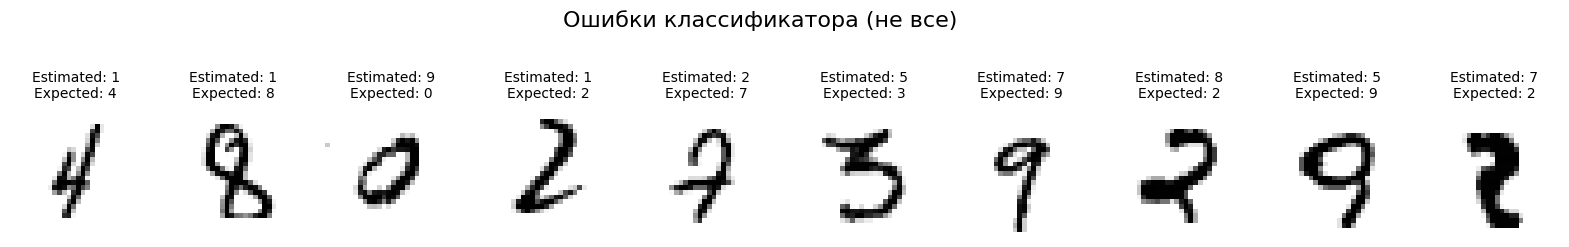

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test[i] != y_pred[i]):
        pos.append(i)

print(f"Кол-во ошибок: {len(pos)}")
pos = pos[:10]

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(1, 10, figsize=(20, 4))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes):
    ax.imshow(np.array(X_test)[pos[i]].reshape((28, 28)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора (не все)', fontsize=16, y=0.9)
fig.show()

## 2. Обучение (бинарная классификация: четные и нечетные)

In [ ]:
#@title Обновляем значения целевых признаков (классы 0 или 1)

y_train1 = y_train.astype(int) % 2
y_test1 = y_test.astype(int) % 2

### MLPClassifier (без подбора параметров)

In [ ]:
#@title Анализируем работу различных масштабирований и нормализаций

scalers = [None, MinMaxScaler(), MinMaxScaler((-1, 1)), StandardScaler()]
scalers_name = ["None", "MinMaxScaler[0,1]", "MinMaxScaler[-1,1]", "StandardScaler"]

for i in range(4):
    steps = []

    if scalers is not None:
        steps.append(('scaler', scalers[i]))

    steps.append(('estimator', MLPClassifier()))
    pipe = Pipeline(steps=steps).fit(X_train, y_train1)
    y_pred = pipe.predict(X_test)

    print(f"MLPClassifier + {scalers_name[i]} (число ошибок): {np.where(y_pred != y_test1)[0].shape[0]}")

MLPClassifier + None (число ошибок): 308
MLPClassifier + MinMaxScaler[0,1] (число ошибок): 248
MLPClassifier + MinMaxScaler[-1,1] (число ошибок): 250
MLPClassifier + StandardScaler (число ошибок): 320


#### Итоговая модель

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier())]).fit(X_train, y_train1)
pipe

Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier())])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train1, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25813
           1       1.00      1.00      1.00     26687

    accuracy                           1.00     52500
   macro avg       1.00      1.00      1.00     52500
weighted avg       1.00      1.00      1.00     52500



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8605
           1       0.99      0.98      0.99      8895

    accuracy                           0.99     17500
   macro avg       0.99      0.99      0.99     17500
weighted avg       0.99      0.99      0.99     17500



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test1, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff'] + (25 * ['#23c552']), text_auto=True)

fig.update_layout(width=400, height=400)
fig.show()

Кол-во ошибок: 258


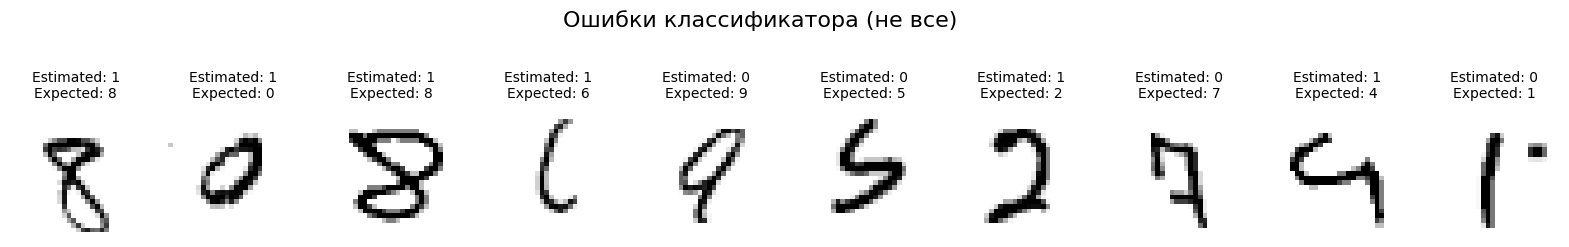

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test1[i] != y_pred[i]):
        pos.append(i)

print(f"Кол-во ошибок: {len(pos)}")
pos = pos[:10]

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(1, 10, figsize=(20, 4))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes):
    ax.imshow(np.array(X_test)[pos[i]].reshape((28, 28)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора (не все)', fontsize=16, y=0.9)
fig.show()

### MLPClassifier (с подбором параметров)

In [ ]:
#@title Анализируем работу различных функций активации (ФА) и оптимизаторов

for activation in ['tanh', 'relu']:
    for solver in ['lbfgs', 'sgd', 'adam']:
        pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(activation=activation, solver=solver))]).fit(X_train, y_train1)
        y_pred = pipe.predict(X_test)

        print(f"MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation={activation}, solver={solver}): {np.where(y_pred != y_test1)[0].shape[0]}")

MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=tanh, solver=lbfgs): 323


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=tanh, solver=sgd): 348
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=tanh, solver=adam): 335
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=relu, solver=lbfgs): 283


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=relu, solver=sgd): 310
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=relu, solver=adam): 362


In [ ]:
#@title Анализируем работу при различных параметрах регуляризации

for alpha in np.geomspace(0.0001, 1, 5):
    pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(alpha=alpha, solver='lbfgs'))]).fit(X_train, y_train1)
    y_pred = pipe.predict(X_test)

    print(f"MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha={alpha}): {np.where(y_pred != y_test1)[0].shape[0]}")

MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=0.0001): 321
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=0.001): 291
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=0.01): 285
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=0.1): 280
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=1.0): 275


#### Итоговая модель

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(alpha=1.0, solver='lbfgs'))]).fit(X_train, y_train1)
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator', MLPClassifier(alpha=1.0, solver='lbfgs'))])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train1, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25813
           1       1.00      1.00      1.00     26687

    accuracy                           1.00     52500
   macro avg       1.00      1.00      1.00     52500
weighted avg       1.00      1.00      1.00     52500



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8605
           1       0.98      0.98      0.98      8895

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test1, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff'] + (25 * ['#23c552']), text_auto=True)

fig.update_layout(width=400, height=400)
fig.show()

Кол-во ошибок: 278


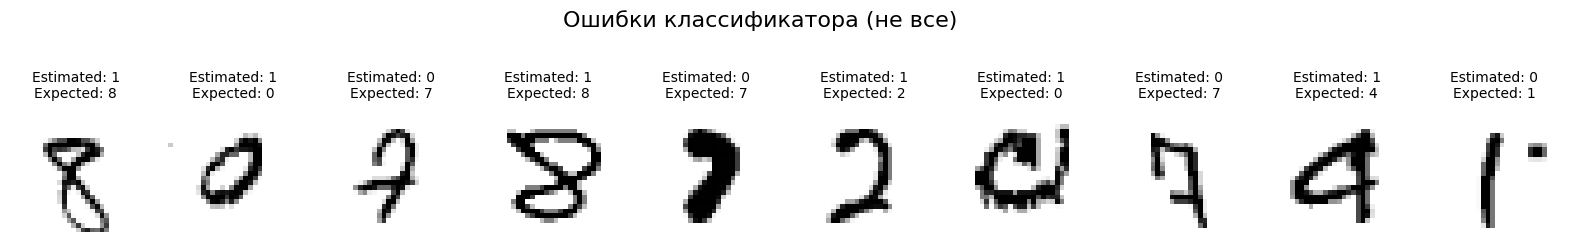

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test1[i] != y_pred[i]):
        pos.append(i)

print(f"Кол-во ошибок: {len(pos)}")
pos = pos[:10]

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(1, 10, figsize=(20, 4))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes):
    ax.imshow(np.array(X_test)[pos[i]].reshape((28, 28)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора (не все)', fontsize=16, y=0.9)
fig.show()

### MLPClassifier (с уменьшением размерности)

#### MLPClassifier + PCA

In [ ]:
#@title Подбираем число признаков

for n in np.linspace(150, 600, 4, dtype=int):
    pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=n)), ('estimator', MLPClassifier(alpha=1.0, solver='lbfgs'))]).fit(X_train, y_train1)
    y_pred = pipe.predict(X_test)

    print(f"MLPClassifier + MinMaxScaler[0, 1] + PCA(n_components={n}) + MLPClassifier(): {np.where(y_pred != y_test1)[0].shape[0]}")

MLPClassifier + MinMaxScaler[0, 1] + PCA(n_components=150) + MLPClassifier(): 293
MLPClassifier + MinMaxScaler[0, 1] + PCA(n_components=300) + MLPClassifier(): 287
MLPClassifier + MinMaxScaler[0, 1] + PCA(n_components=450) + MLPClassifier(): 279
MLPClassifier + MinMaxScaler[0, 1] + PCA(n_components=600) + MLPClassifier(): 289


In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),  ('pca', PCA(n_components=450)), ('estimator', MLPClassifier())]).fit(X_train, y_train1)
pipe

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=450)),
                ('estimator', MLPClassifier())])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train1, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25813
           1       1.00      1.00      1.00     26687

    accuracy                           1.00     52500
   macro avg       1.00      1.00      1.00     52500
weighted avg       1.00      1.00      1.00     52500



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8605
           1       0.98      0.98      0.98      8895

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test1, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff'] + (25 * ['#23c552']), text_auto=True)

fig.update_layout(width=400, height=400)
fig.show()

Кол-во ошибок: 308


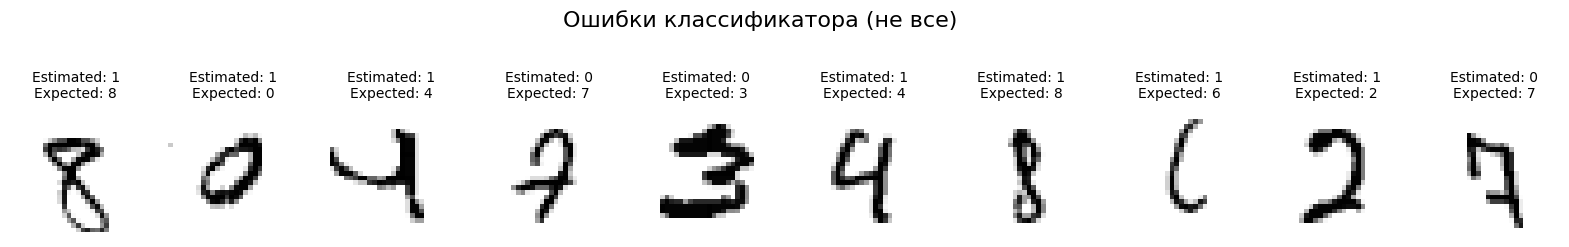

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test1[i] != y_pred[i]):
        pos.append(i)

print(f"Кол-во ошибок: {len(pos)}")
pos = pos[:10]

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(1, 10, figsize=(20, 4))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes):
    ax.imshow(np.array(X_test)[pos[i]].reshape((28, 28)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора (не все)', fontsize=16, y=0.9)
fig.show()

## 3. Обучение (бинарная классификация: ноль и не ноль)

In [ ]:
#@title Обновляем значения целевых признаков (классы 0 или 1)

y_train2 = np.where(y_train == '0', 0, 1)
y_test2 =np.where(y_test == '0', 0, 1)

### MLPClassifier (без подбора параметров)

In [ ]:
#@title Анализируем работу различных масштабирований и нормализаций

scalers = [None, MinMaxScaler(), MinMaxScaler((-1, 1)), StandardScaler()]
scalers_name = ["None", "MinMaxScaler[0,1]", "MinMaxScaler[-1,1]", "StandardScaler"]

for i in range(4):
    steps = []

    if scalers is not None:
        steps.append(('scaler', scalers[i]))

    steps.append(('estimator', MLPClassifier()))
    pipe = Pipeline(steps=steps).fit(X_train, y_train2)
    y_pred = pipe.predict(X_test)

    print(f"MLPClassifier + {scalers_name[i]} (число ошибок): {np.where(y_pred != y_test2)[0].shape[0]}")

MLPClassifier + None (число ошибок): 46
MLPClassifier + MinMaxScaler[0,1] (число ошибок): 43
MLPClassifier + MinMaxScaler[-1,1] (число ошибок): 68
MLPClassifier + StandardScaler (число ошибок): 51


#### Итоговая модель

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier())]).fit(X_train, y_train2)
pipe

Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier())])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train2, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5177
           1       1.00      1.00      1.00     47323

    accuracy                           1.00     52500
   macro avg       1.00      1.00      1.00     52500
weighted avg       1.00      1.00      1.00     52500



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1726
           1       1.00      1.00      1.00     15774

    accuracy                           1.00     17500
   macro avg       0.99      0.99      0.99     17500
weighted avg       1.00      1.00      1.00     17500



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test2, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff', '#23c552', '#23c552', '#23c552', '#23c552', '#23c552'], text_auto=True)

fig.update_layout(width=400, height=400)
fig.show()

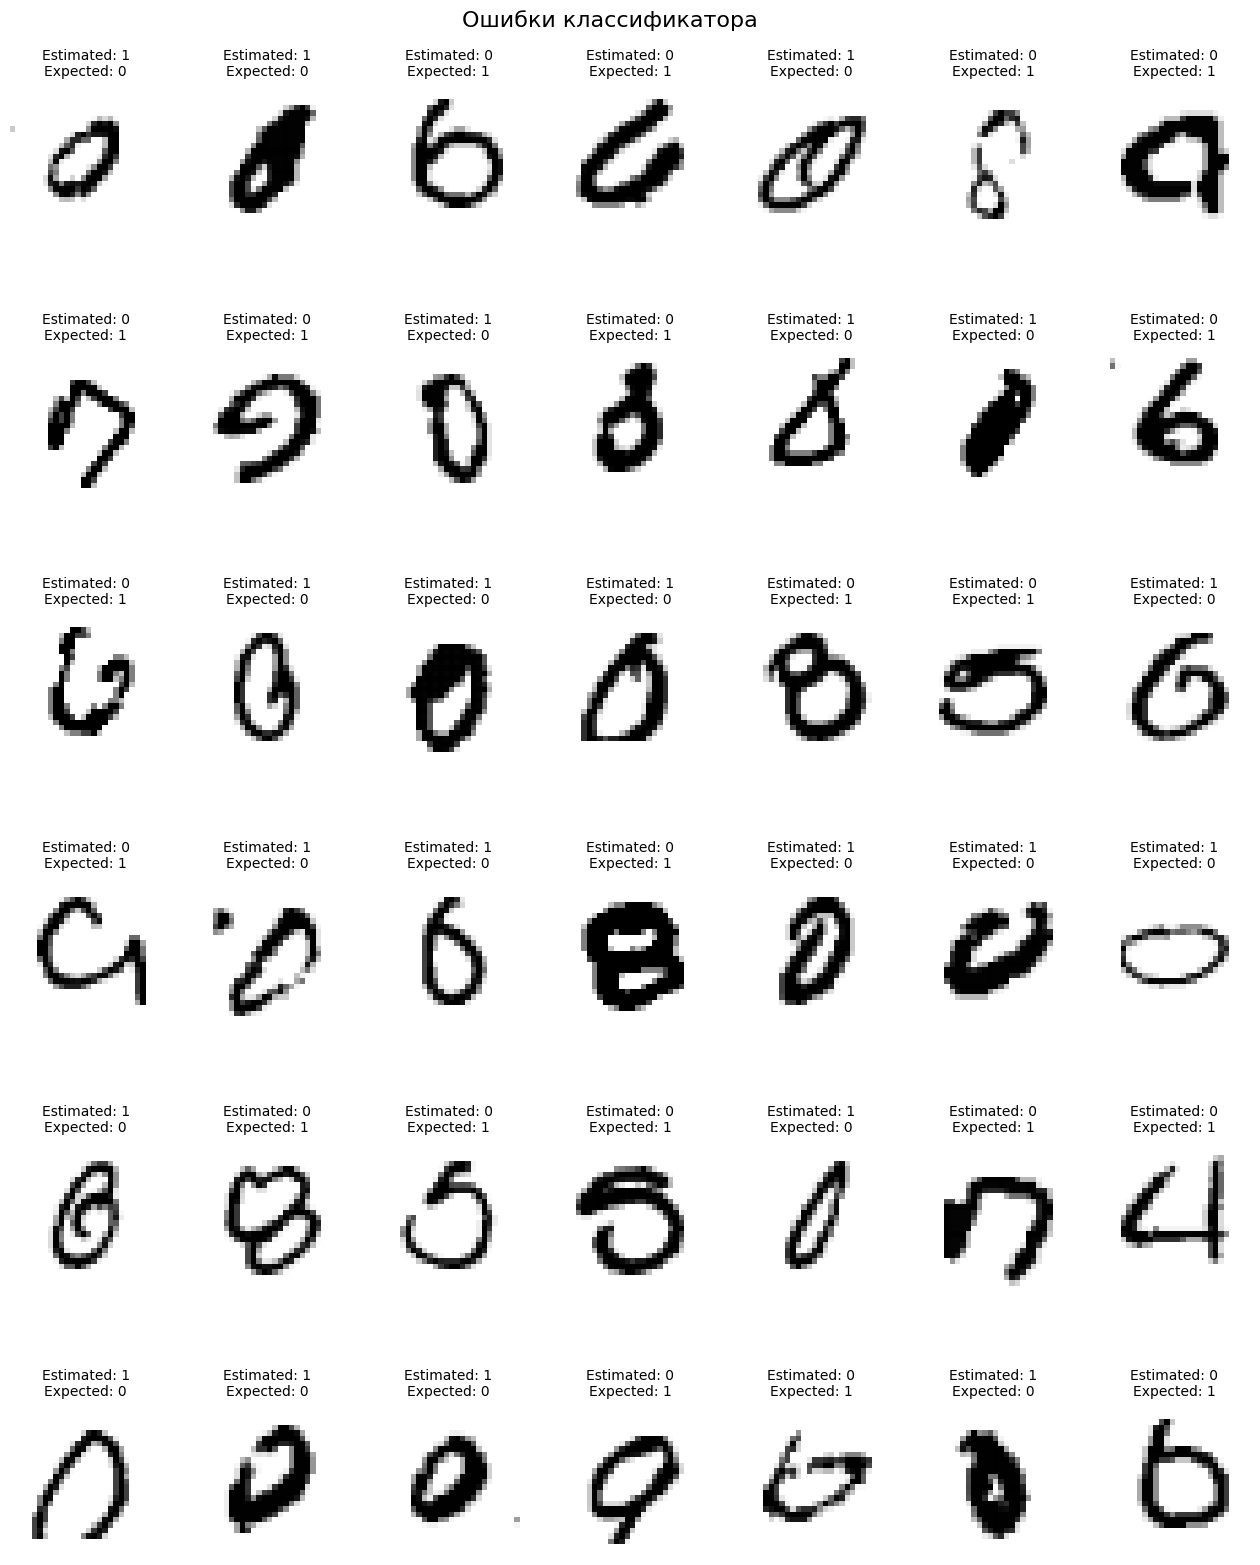

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test2[i] != y_pred[i]):
        pos.append(i)

pos = pos[:42]

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(6, 7, figsize=(16, 20))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(X_test)[pos[i]].reshape((28, 28)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test2[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора', fontsize=16, y=0.9)
fig.show()

### MLPClassifier (с подбором параметров)

In [ ]:
#@title Анализируем работу различных функций активации (ФА) и оптимизаторов

for activation in ['tanh', 'relu']:
    for solver in ['lbfgs', 'sgd', 'adam']:
        pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(activation=activation, solver=solver))]).fit(X_train, y_train2)
        y_pred = pipe.predict(X_test)

        print(f"MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation={activation}, solver={solver}): {np.where(y_pred != y_test2)[0].shape[0]}")

MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=tanh, solver=lbfgs): 56
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=tanh, solver=sgd): 116
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=tanh, solver=adam): 43
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=relu, solver=lbfgs): 45
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=relu, solver=sgd): 73
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(activation=relu, solver=adam): 47


In [ ]:
#@title Анализируем работу при различных параметрах регуляризации

for alpha in np.geomspace(0.0001, 1, 5):
    pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(alpha=alpha, activation='tanh'))]).fit(X_train, y_train2)
    y_pred = pipe.predict(X_test)

    print(f"MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha={alpha}): {np.where(y_pred != y_test2)[0].shape[0]}")

MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=0.0001): 42
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=0.001): 44
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=0.01): 41
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=0.1): 61
MLPClassifier + MinMaxScaler[0, 1] + MLPClassifier(alpha=1.0): 160


#### Итоговая модель

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(alpha=0.01, activation='tanh'))]).fit(X_train, y_train2)
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator', MLPClassifier(activation='tanh', alpha=0.01))])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train2, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5177
           1       1.00      1.00      1.00     47323

    accuracy                           1.00     52500
   macro avg       1.00      1.00      1.00     52500
weighted avg       1.00      1.00      1.00     52500



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1726
           1       1.00      1.00      1.00     15774

    accuracy                           1.00     17500
   macro avg       1.00      0.99      0.99     17500
weighted avg       1.00      1.00      1.00     17500



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test2, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff'] + (25 * ['#23c552']), text_auto=True)

fig.update_layout(width=400, height=400)
fig.show()

Кол-во ошибок: 32


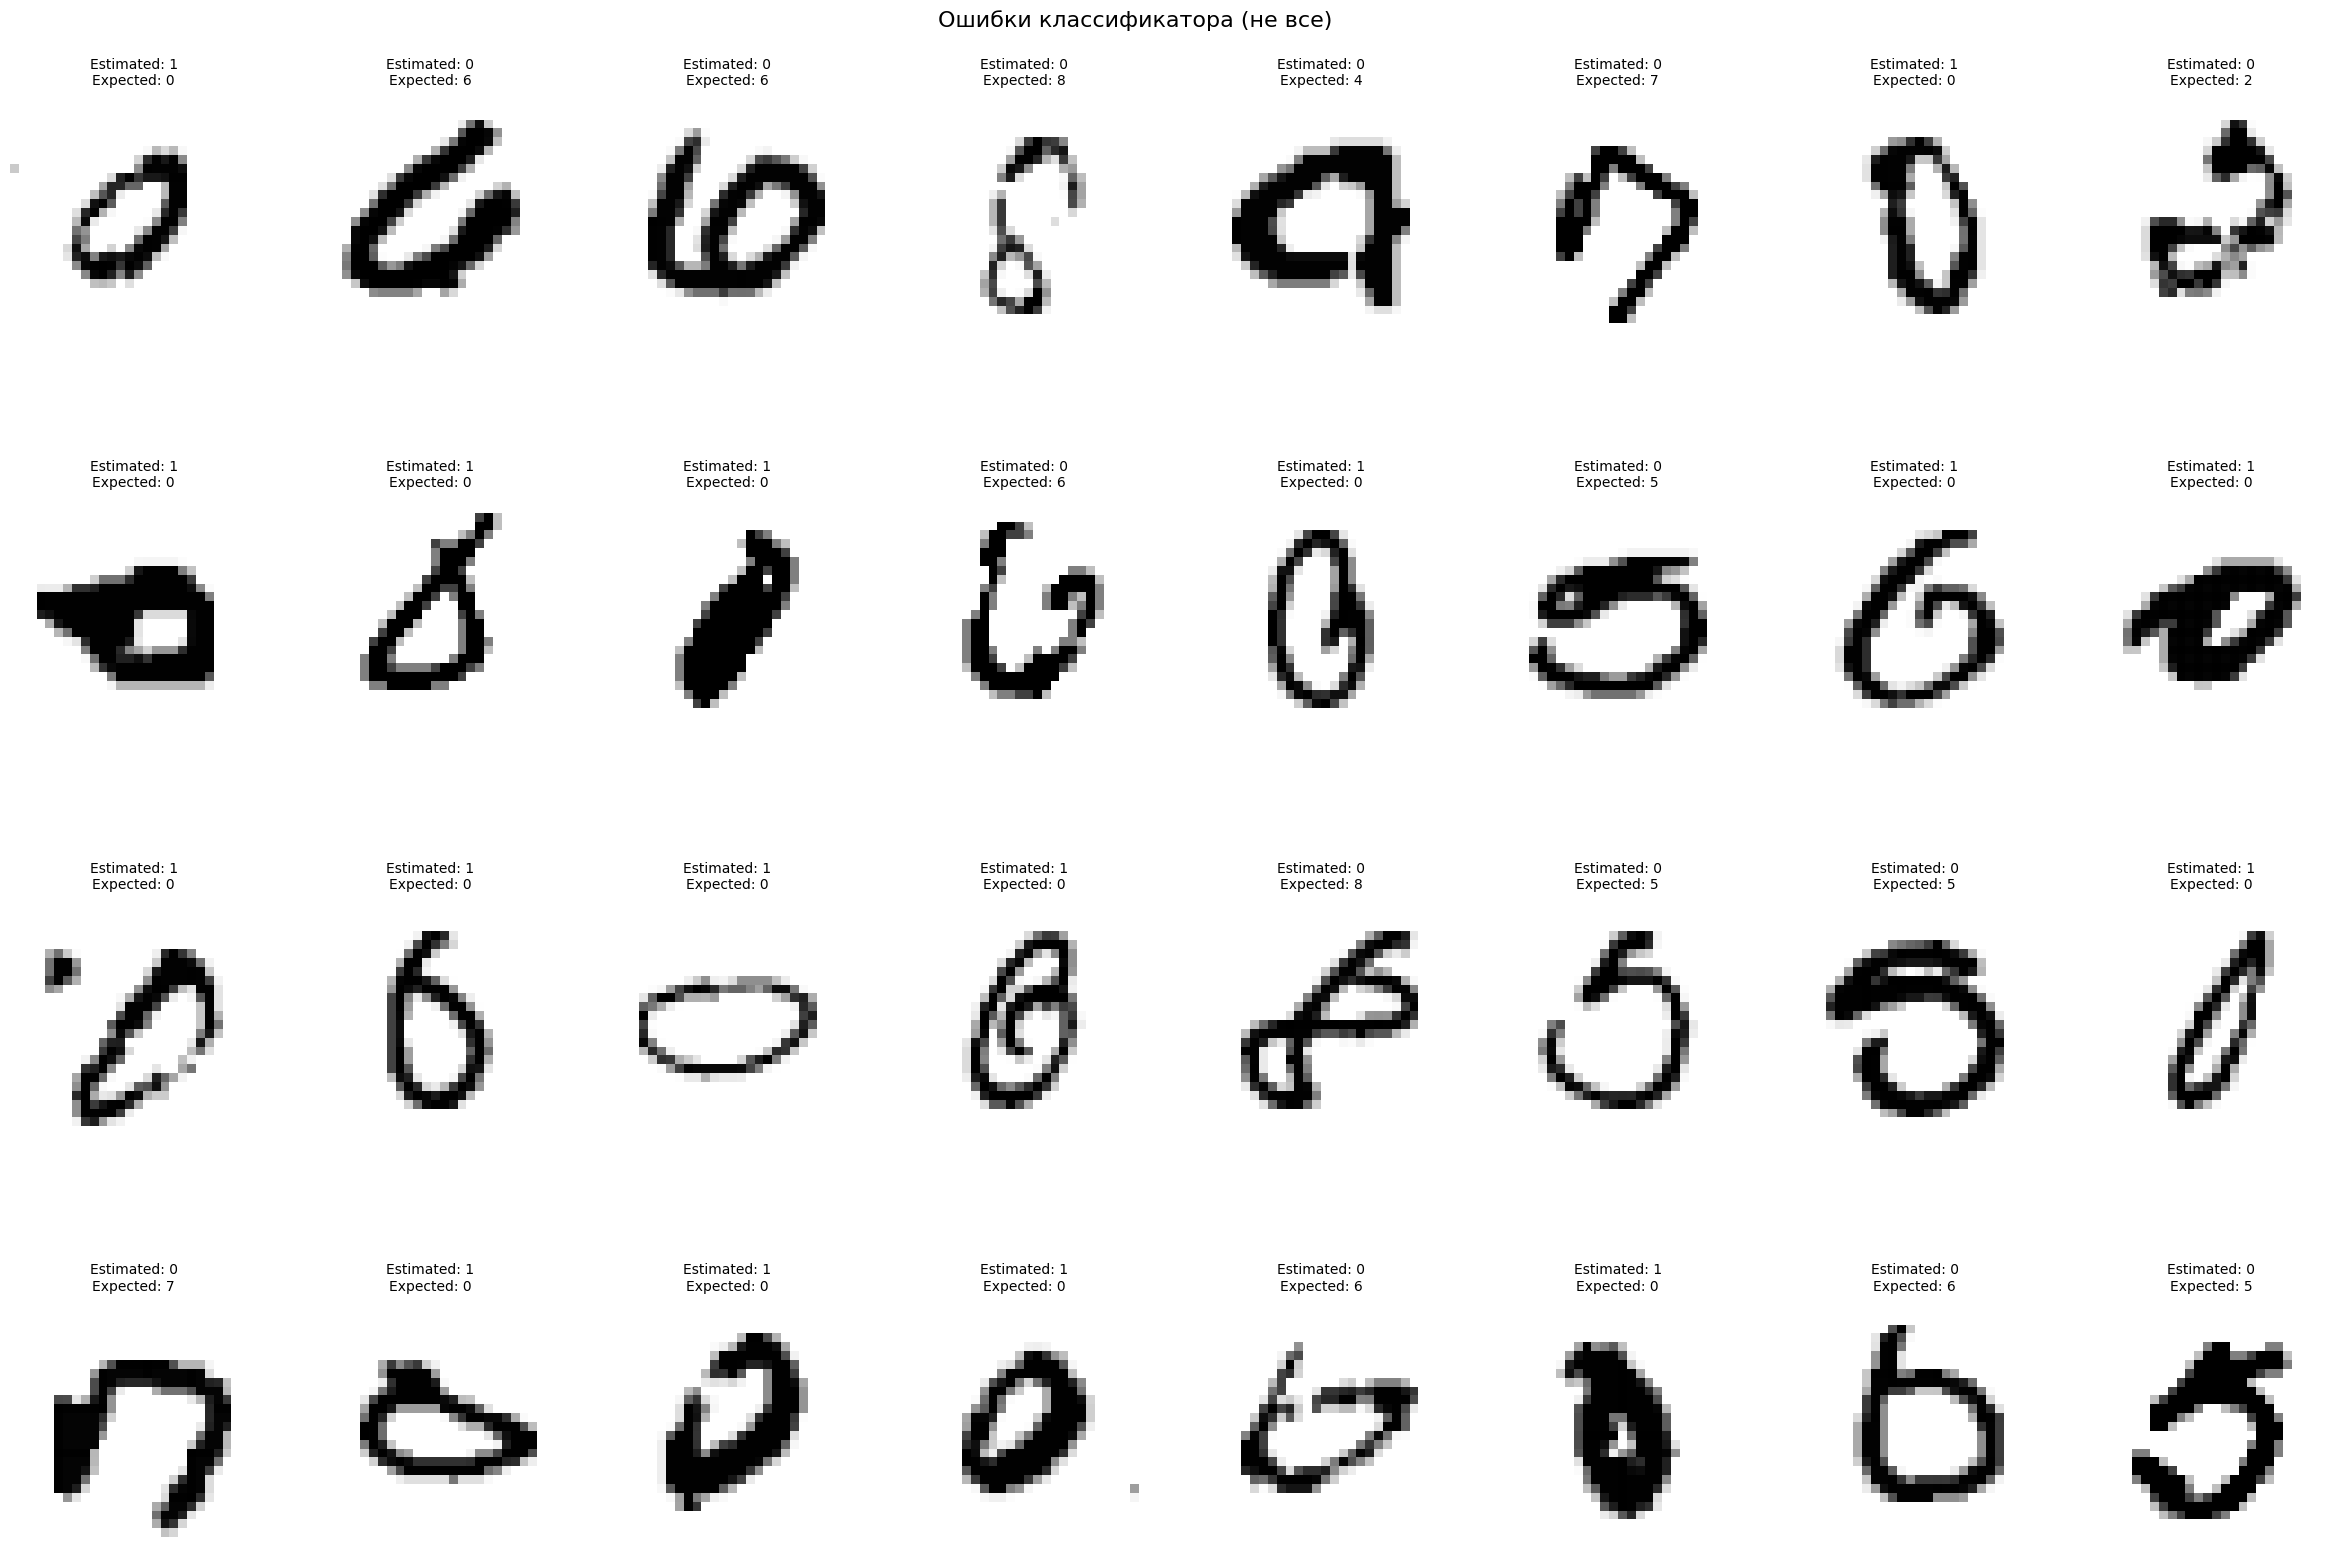

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test2[i] != y_pred[i]):
        pos.append(i)

print(f"Кол-во ошибок: {len(pos)}")

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(4, 8, figsize=(30, 20))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(X_test)[pos[i]].reshape((28, 28)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора (не все)', fontsize=16, y=0.9)
fig.show()

### MLPClassifier (с уменьшением размерности)

In [ ]:
#@title Поиск ненужных признаков

X_train_np = np.array(X_train)

cnt = []
pos = []

for j in range(X_train.shape[-1]):
    sum = np.sum(np.where(X_train_np[::,j].reshape(-1) != 0, 1, 0))
    cnt.append(sum)

    if sum < 100:
        pos.append(j)

fig = px.histogram(x=cnt, nbins=500, marginal='box')
fig.show()

In [ ]:
#@title Удаляем ненужные признаки

X_train_np = np.delete(X_train_np, pos, 1)
print(f"Количество признаков: {X_train_np.shape[-1]}")

Количество признаков: 564


#### Итоговая модель

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(alpha=0.01, activation='tanh'))]).fit(X_train_np, y_train2)
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator', MLPClassifier(activation='tanh', alpha=0.01))])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train_np)
print(classification_report(y_train2, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5177
           1       1.00      1.00      1.00     47323

    accuracy                           1.00     52500
   macro avg       1.00      1.00      1.00     52500
weighted avg       1.00      1.00      1.00     52500



In [ ]:
#@title Тестовая выборка

X_test_np = np.delete(np.array(X_test), pos, 1)

y_pred = pipe.predict(X_test_np)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1726
           1       1.00      1.00      1.00     15774

    accuracy                           1.00     17500
   macro avg       0.99      1.00      0.99     17500
weighted avg       1.00      1.00      1.00     17500



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test2, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff'] + (25 * ['#23c552']), text_auto=True)

fig.update_layout(width=400, height=400)
fig.show()

Кол-во ошибок: 44


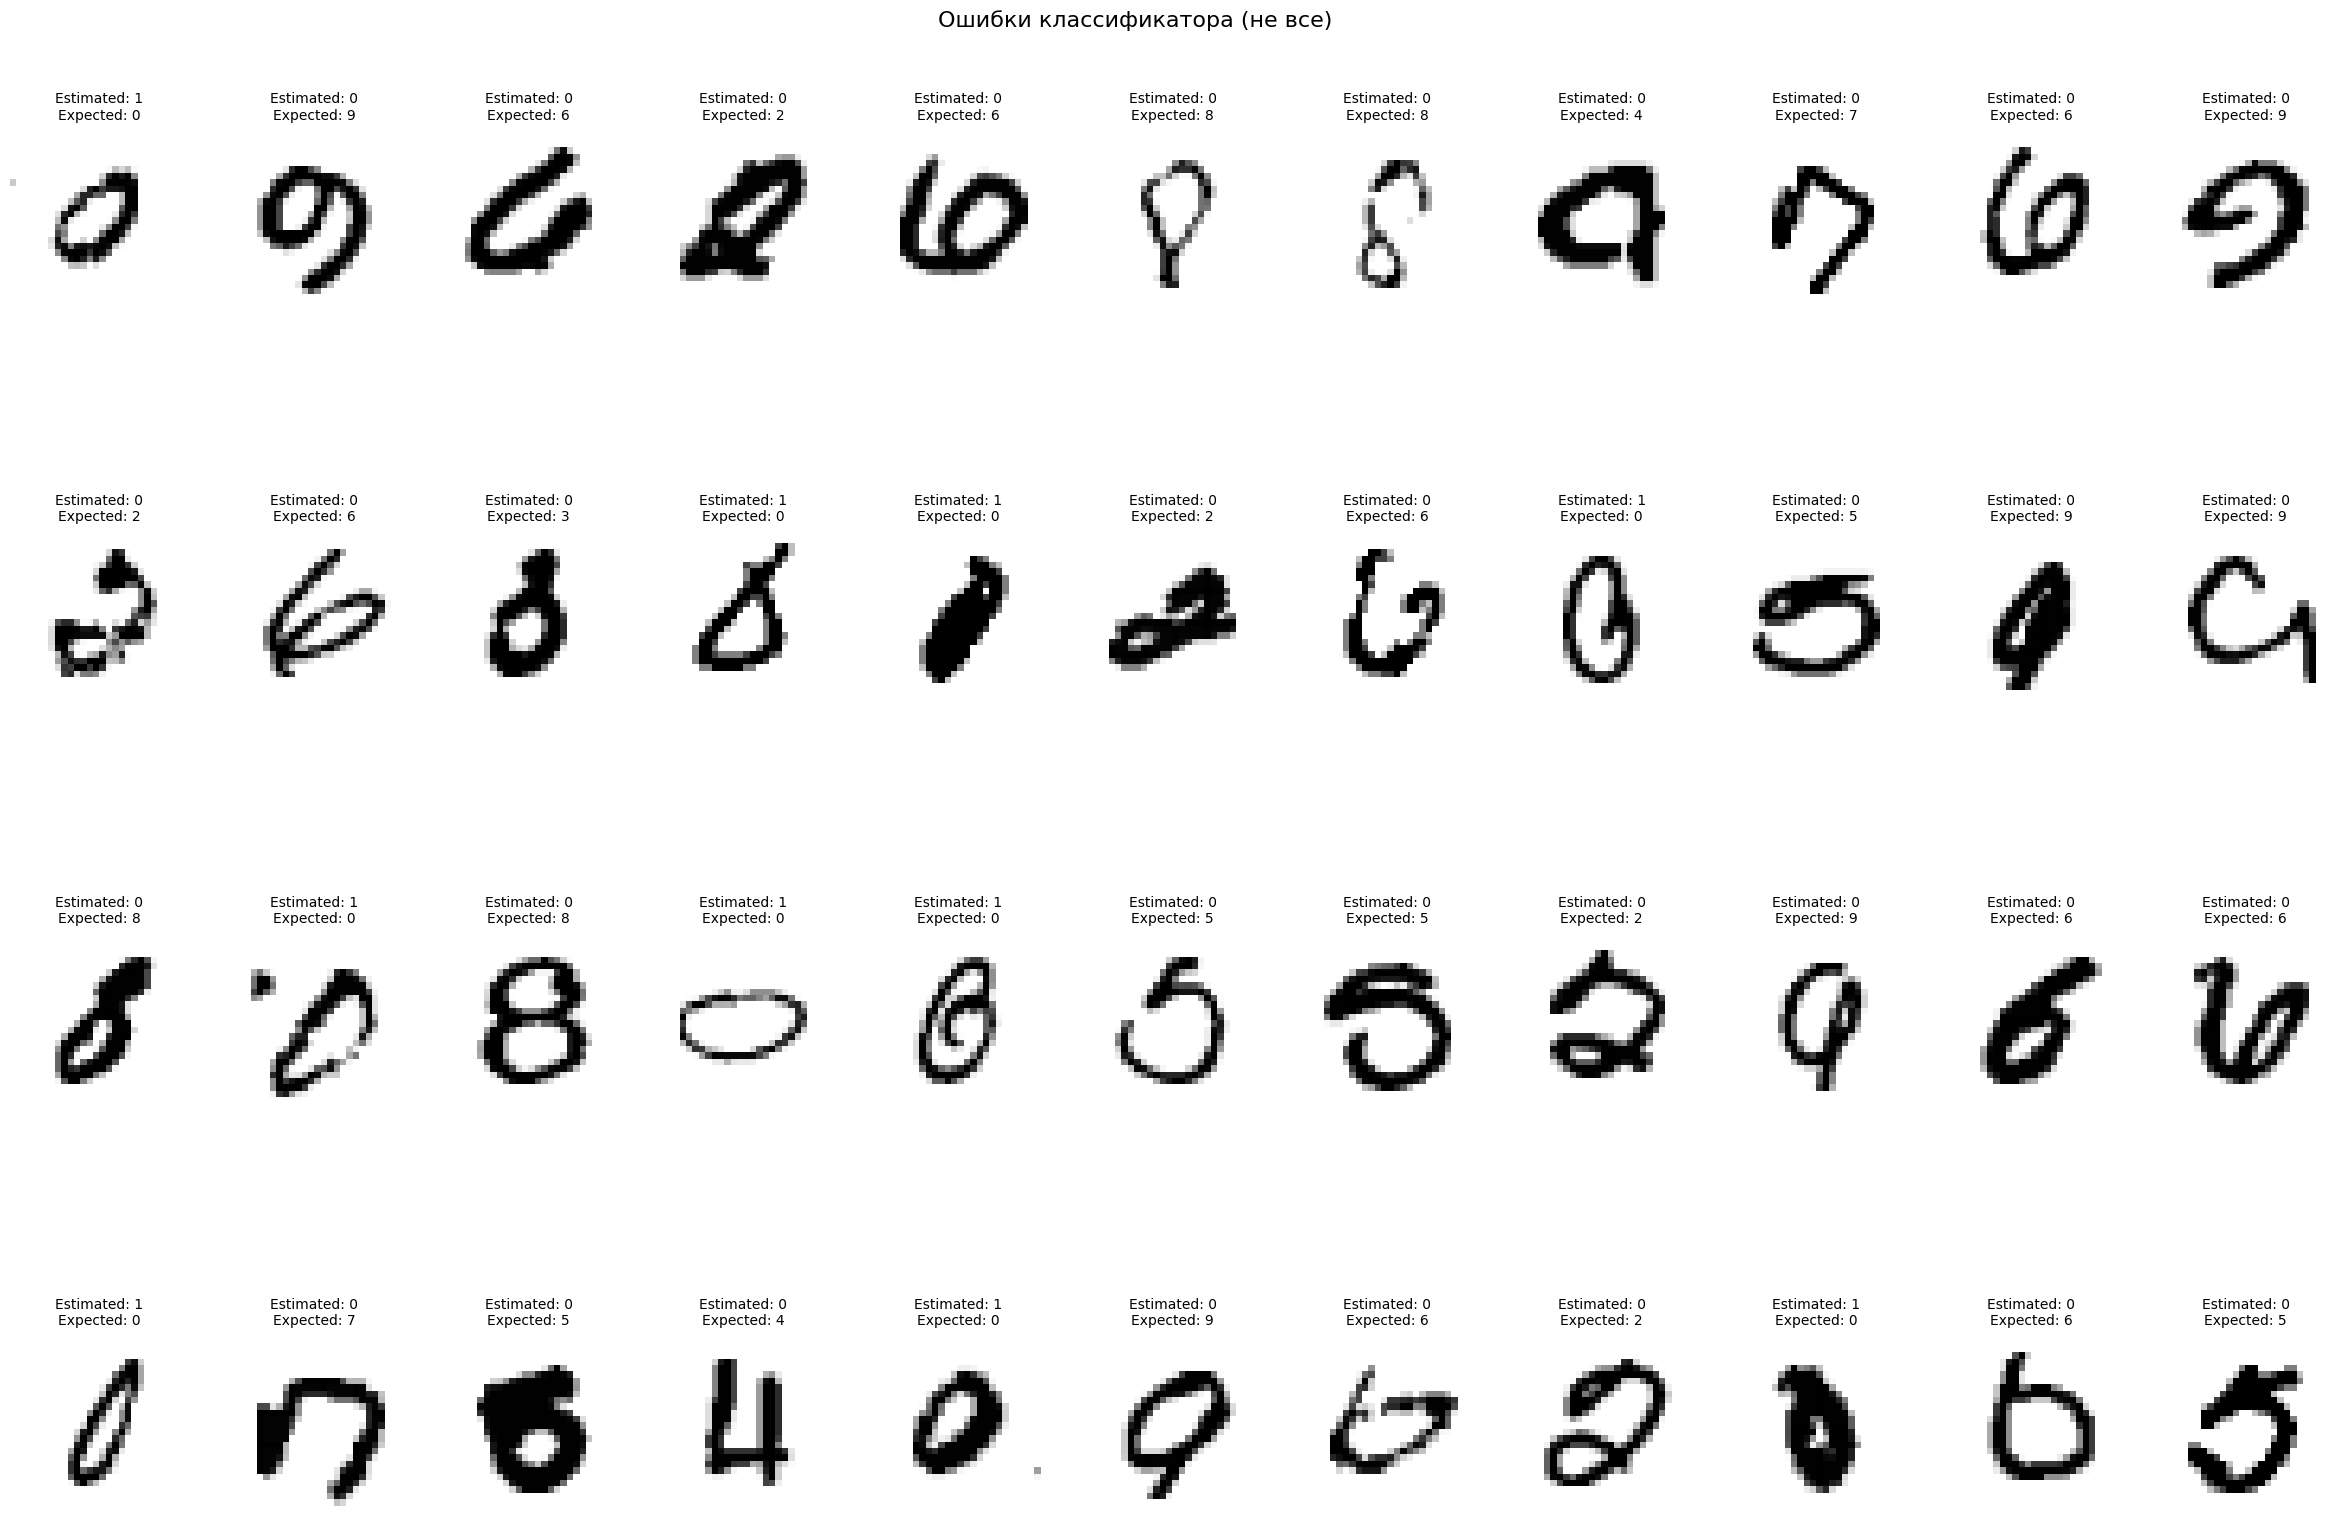

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test2[i] != y_pred[i]):
        pos.append(i)

print(f"Кол-во ошибок: {len(pos)}")

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(4, 11, figsize=(30, 20))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(X_test)[pos[i]].reshape((28, 28)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора (не все)', fontsize=16, y=0.9)
fig.show()